In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

## USER DEFINITION

In [2]:
%load_ext Cython

In [3]:
%%cython

cdef extern from "stdlib.h":
    double drand48()

class User(object):
    THRESHOLD = 80
    K = 0.2 #basal production of dopamine 
    DELTA = 0.0001

    def __init__(self, id, d=0.2, m=0):
        self._id = int(id)
        self._d = float(d)
        self._m = float(m)
        self._r = 0
        self._dip = 0
        self._propensity_factor = 0.2
        self._count_mess_sent = 0
        self._count_answer_received = 0

    def __repr__(self):
        return "User {}".format(self._id)

    @staticmethod
    def update_status(u, n_rounds):
        DELTA = User.DELTA
        K = User.K
        THRESHOLD = User.THRESHOLD
        COMP_STIM = User._compute_stimulus
        COMP_RECA = User._compute_recall

        cdef float d = u._d
        cdef float m = u._m
        cdef float r = u._r

        for i in range(n_rounds):
            d = d + (( -d + COMP_STIM(d, m, r, THRESHOLD) + K)* DELTA * 0.3 )
            m = m + (( -m + COMP_RECA(m, r)) * DELTA * 0.3 )          

        u._d = d
        u._m = m
        u._r = r

    @staticmethod
    def _compute_stimulus(d, m, r, threshold): #
        cdef float diff = r - m
        if -30 <= diff < threshold:
            return 0.0
        elif threshold <= diff:
            return 1.0
        else:
            return -(m * d)/ 2.0

    @staticmethod
    def _compute_recall (m, r):
        cdef float diff = r - m
        if diff > 0:
            return diff / 2.0
        else:
            return 0.0
    
    def update_impulsus(u, r): #update reward 
            u._r = r
    

   

## SIMULATION

In [4]:
# simulation
from time import time as now
from sys import stdout


dop=[] #array dopamine
n_rounds=50 #50 days
u=User(1) #user instance 
step= float(50.0/250.0) #step for Euler method


for day in np.arange(0, n_rounds, step):
    dop.append(u._d) #u._d -> user's dopamine level
    User.update_status(u, 5000)
    
    if day <=25:
        User.update_impulsus(u, 100) #update reward-> max level of reward for the first 25 days
        
    else:
        User.update_impulsus(u, 0) #reward=0 to simulate withdrawal symptoms
          
        

time=[]
for i in range(0,len(dop)):
        i=(i/5.0)
        time.append(i)

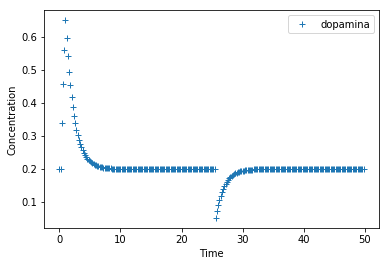

In [5]:
#Plot dopamine in 50 days

plt.plot(time, dop, "+", label="dopamina")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend();